## PYTHON JOURNEY MACHINE & DEEP LEARNING
### Trabalho prático usando Python
 
### Árvore de Decisão - Modelo de Inadimplência PF

### Segmento Cartão de Crédito

### A área de crédito deseja  avaliar  a propensão ao risco  de seus clientes e implementar políticas de redução da inadimplência 

### Dicionário de variáveis

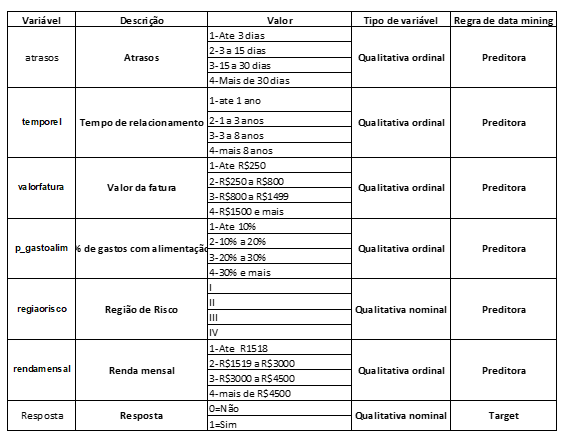

In [ ]:
# Importar as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Importar os dados
df = pd.read_csv('arq_inadimplencia.csv', ";")

In [ ]:
df.head(20)

In [ ]:
df.info()

In [ ]:
# Mudar o formato da variável resposta para qualitativa
df['Resposta'] = df['Resposta'].astype(str)
df['atrasos'] = df['atrasos'].astype(str)
df['temporel'] = df['temporel'].astype(str)
df['valorfatura'] = df['valorfatura'].astype(str)
df['p_gastoalim'] = df['p_gastoalim'].astype(str)
df['rendamensal'] = df['rendamensal'].astype(str)
df['regiaorisco'] = df['regiaorisco'].astype(str)

In [ ]:
df.info()

In [ ]:
# Selecionar as variáveis de análises
var_cat =['atrasos','Resposta','temporel', 'valorfatura','p_gastoalim','regiaorisco','rendamensal']

In [ ]:
# Análise das variáveis qualitativas
features = var_cat
fig,axs=plt.subplots(nrows=2, ncols=4, figsize=(18,10))
for col, ax in zip(features[1:], axs.ravel()):
    x=df.loc[:, col]
    sns.countplot(x, ax=ax, orient='v')
    plt.subplots_adjust(top=0.92,bottom=0.08, left=0.10,right=0.95,hspace=0.25,wspace=0.4)

In [ ]:
# Tabela de frequência da variável Resposta
Resposta =pd.pivot_table(df, index='Resposta', values='cliente', aggfunc=np.count_nonzero)
Resposta['%'] = ((pd.pivot_table(df, index='Resposta', values = 'cliente', aggfunc=np.count_nonzero)/df['cliente'].count())*100).round(2)

In [ ]:
Resposta

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Dividir a amostra treino e teste
X = df.drop(['cliente', 'Resposta'],axis=1)
y = df['Resposta']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
X.info()

In [ ]:
y_train.describe()

In [ ]:
X_train.info()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

### Predição da Árvore de Decisão

In [ ]:
predictions = dtree.predict(X_train)

### Avaliação do acerto da Árvore de Classificação

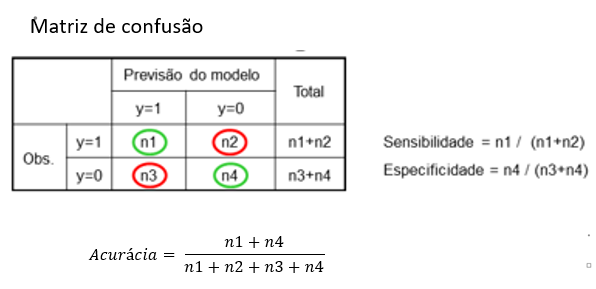

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth = 2) # instância do classificador
clf = clf.fit(X_train, y_train) 


In [ ]:
# Árvore de Decisão
plt.figure(figsize = (80,20))
plot_tree(clf) 
plt.show()

In [ ]:
### Amostra teste

In [ ]:
clf_teste = clf.fit(X_test, y_test) 

In [ ]:
predictions_test = dtree.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions_test))